### Task: Prediction of sales for over 1000 drugstores around Germany for a period of 6 weekd
In the following, the main steps toward understnding the data , its structure and its possible impacts and influences on the prediction model is investigated.
It has been tried to visualize the correlation between different associating attributes, available in the dataset.
In this file, 2 different data sets, as store and train has been used. The store data, relate to the attributes of each store, available in the dataset and teh train data are the features that are studied and further investigated.

In [1]:
#some of the libraries that have been used for the feature enginnering is loaded
import pandas as pd
import csv as csv
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib
import matplotlib.pylab as pl

In [2]:
#the data in the csv format is loaded. 
train = pd.read_csv(r'C:...\data\train.csv', header=0, dtype={'StateHoliday':'str'})
store = pd.read_csv(r'C:...\data\store.csv', header=0)

In [3]:
len(train)

1017209

In [5]:
# I drop the following columns from train data
train = train.drop(['Promo','StateHoliday','SchoolHoliday'], axis = 1)

In [6]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open
0,1,5,2015-07-31,5263,555,1
1,2,5,2015-07-31,6064,625,1
2,3,5,2015-07-31,8314,821,1
3,4,5,2015-07-31,13995,1498,1
4,5,5,2015-07-31,4822,559,1


In [7]:
len(store)

1115

In [8]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [9]:
# I just keep the following columns from store data
store = store[['Store','StoreType','Assortment','CompetitionDistance']]

In [10]:
#Merging the store and train data together
train = pd.merge(train,store, on='Store')

In [11]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,StoreType,Assortment,CompetitionDistance
0,1,5,2015-07-31,5263,555,1,c,a,1270.0
1,1,4,2015-07-30,5020,546,1,c,a,1270.0
2,1,3,2015-07-29,4782,523,1,c,a,1270.0
3,1,2,2015-07-28,5011,560,1,c,a,1270.0
4,1,1,2015-07-27,6102,612,1,c,a,1270.0


In [12]:
# For making the file more coincise, I change the columns to lower case
train.columns = [x.lower() for x in train.columns]

In [13]:
#Essential for modelling anf prediction, but it has anyhow been done here as well
replace_alph_numer = {'assortment': {'a':1,'b':2,'c':3},
                      'storetype': {'a':1,'b':2,'c':3,'d':4}}
train.replace(replace_alph_numer,inplace= True)

In [14]:
for col in train:
    print (type(train[col][1]))

<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'str'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.float64'>


In [15]:
# I extract the day, month and year for each row based on the date
train['year'] = train.date.apply(lambda x: x.split('-'))
train['month'] = train.year.apply(lambda x: int(x[1]))
train['day'] = train.year.apply(lambda x: int(x[2]))
train['year'] = train.year.apply(lambda x: int(x[0]))
train.head()

,store,dayofweek,date,sales,customers,open,storetype,assortment,competitiondistance,year,month,day
0,1,5,2015-07-31,5263,555,1,3,1,1270.0,2015,7,31
1,1,4,2015-07-30,5020,546,1,3,1,1270.0,2015,7,30
2,1,3,2015-07-29,4782,523,1,3,1,1270.0,2015,7,29
3,1,2,2015-07-28,5011,560,1,3,1,1270.0,2015,7,28
4,1,1,2015-07-27,6102,612,1,3,1,1270.0,2015,7,27


In [16]:
train.describe()

,store,dayofweek,sales,customers,open,storetype,assortment,competitiondistance,year,month,day
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.014567e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,2.207467e+00,1.935141e+00,5.430086e+03,2.013832e+03,5.846762e+00,1.570279e+01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,1.365376e+00,9.938011e-01,7.715324e+03,7.773960e-01,3.326097e+00,8.787638e+00
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,2.000000e+01,2.013000e+03,1.000000e+00,1.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,1.000000e+00,1.000000e+00,7.100000e+02,2.013000e+03,3.000000e+00,8.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,1.000000e+00,1.000000e+00,2.330000e+03,2.014000e+03,6.000000e+00,1.600000e+01
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,4.000000e+00,3.000000e+00,6.890000e+03,2.014000e+03,8.000000e+00,2.300000e+01
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,4.000000e+00,3.000000e+00,7.586000e+04,2.015000e+03,1.200000e+01,3.100000e+01


In [17]:
#there are only some missing values for the competition distance
train.isnull().sum().sum()

2642

In [18]:
# chnage the date type from String to datetime
train.date = pd.to_datetime(train.date)

In [19]:
# I wanna know if we have the data continously for all the stores over the whole data collection period
numOfStore = train.groupby(['date','year'], as_index = False).agg({'store': 'count'})

In [20]:
numOfStore.set_index('year',inplace=True)

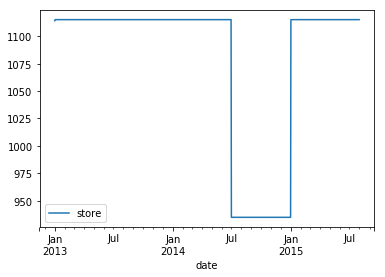

In [21]:
numOfStore.plot.line(x='date',y='store')

In [22]:
# some stores have missing data for a period of time, as shown in the figure
numOfStore.store.unique()

array([1114, 1115,  935], dtype=int64)

In [26]:
#180 stores have missing values for 184 days and one store has missing data for one day
len(numOfStore[numOfStore.store==935])

184

In [23]:
#I wanna know which stores have missing data
ava_stores = train.loc[(train.year == 2014) & (train.month == 7) & (train.day == 5),'store']
all_stores = train.loc[(train.year == 2013) & (train.month == 7) & (train.day == 5),'store']
one_missing_store = train.loc[(train.year == 2013)&(train.month == 1)&(train.day == 1), 'store']

In [24]:
# the stores with missing data for 184 days
all_stores[~all_stores.isin(ava_stores)].dropna()

11876        13
18286        20
19986        22
29222        32
32806        36
37332        41
41858        46
46384        51
47142        52
52610        58
65614        72
69198        76
73724        81
81076        89
90312        99
91070       100
98422       108
102948      113
104648      115
115768      127
117468      129
120110      132
123694      136
124452      137
126152      139
130678      144
131436      145
135020      149
140488      155
144072      159
           ... 
823598      904
828124      909
833592      915
837176      919
837934      920
849054      932
857348      941
867526      952
888066      974
890708      977
901827      989
912005     1000
915589     1004
920115     1009
922757     1012
929167     1019
936519     1027
946697     1038
949339     1041
956691     1049
963101     1056
971395     1065
973095     1067
985157     1080
996277     1092
997977     1094
1005329    1102
1007029    1104
1009671    1107
1011371    1109
Name: store, Length: 180

In [27]:
#I wanna see how the time series of sales look like for one of the above stores
store_22 = train.loc[train.store == 22]

In [28]:
store_22.head()

,store,dayofweek,date,sales,customers,open,storetype,assortment,competitiondistance,year,month,day
19414,22,5,2015-07-31,6566,633,1,1,1,1040.0,2015,7,31
19415,22,4,2015-07-30,5685,575,1,1,1,1040.0,2015,7,30
19416,22,3,2015-07-29,5551,525,1,1,1,1040.0,2015,7,29
19417,22,2,2015-07-28,5761,525,1,1,1,1040.0,2015,7,28
19418,22,1,2015-07-27,7114,621,1,1,1,1040.0,2015,7,27


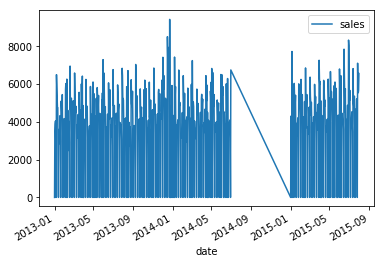

In [29]:
#It can obviously be seen the there is a period with missing data
store_22.plot.line(x='date',y='sales')

In [30]:
# I wanna know which store has missing data for one day 
all_stores[~all_stores.isin(one_missing_store)].dropna()

901070    988
Name: store, dtype: int64

In [31]:
missing_stores_dates = numOfStore.loc[numOfStore.store==935]
# if we check missing_stores_dates, we can see that 180 stores have missing values from 01-07-2014 till 31-12-2014

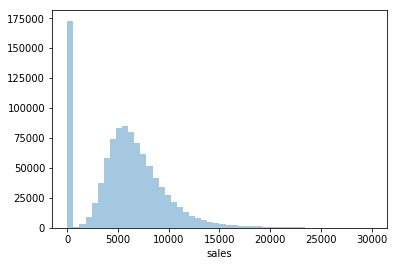

In [32]:
#Distribution of sales
sns.distplot(train.sales, kde = False, hist_kws={'range':[0,30000]})

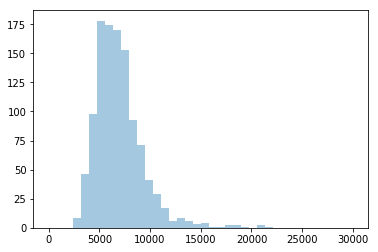

In [33]:
# distribution of sales when there was a sale
sns.distplot(train.groupby('store').aggregate({'sales': lambda y: np.mean([x for x in y if x!=0])}), kde =False, 
             hist_kws={'range': [0,30000]})

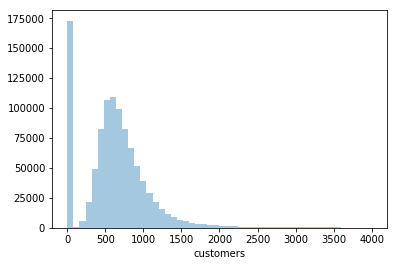

In [34]:
#distribution of customers
sns.distplot(train.customers, kde = False, hist_kws={'range':[0,4000]})

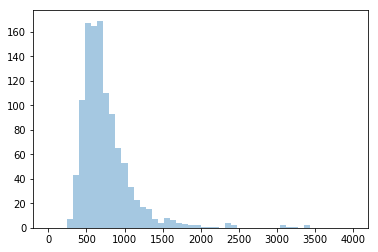

In [35]:
#distribution of customers when there were customers
sns.distplot(train.groupby('store').aggregate({'customers': lambda y: np.mean([x for x in y if x!=0])}), kde =False, 
             hist_kws={'range': [0,4000]})

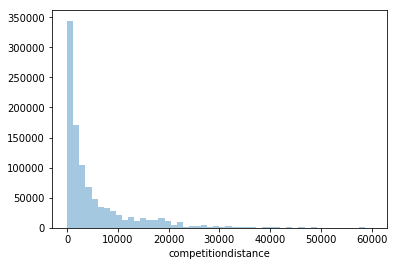

In [36]:
#distribution of competition distance
sns.distplot(train[train.competitiondistance>0].competitiondistance, kde=False, hist_kws={'range': [0,60000]})

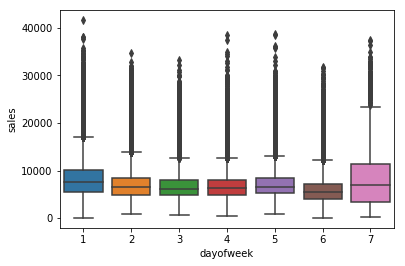

In [37]:
# Amount of sales in different working days
sns.boxplot(y='sales',x='dayofweek',data=train[(train.sales!=0)])

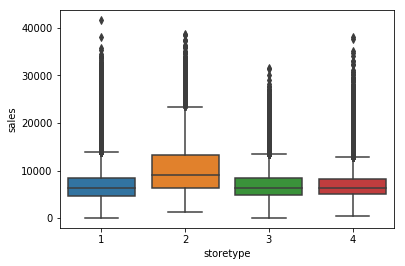

In [38]:
#distribution of sales based on store type
sns.boxplot(y='sales',x='storetype',data=train[(train.sales!=0)])

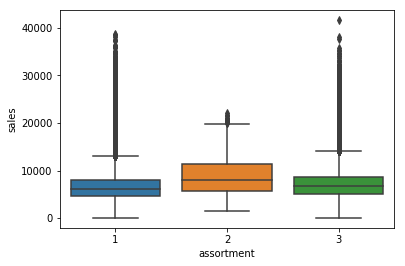

In [39]:
distribution of sales based on the store
sns.boxplot(y='sales',x='assortment',data=train[(train.sales!=0)])

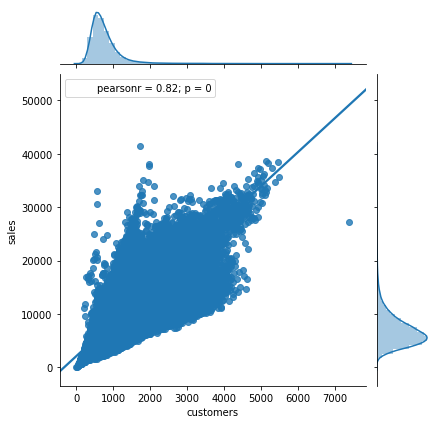

In [40]:
# correlation between customers and sales
sns.jointplot(x='customers', y='sales', data=train[(train.sales != 0)], kind='reg')

In [41]:
# it would be good to check th elog relationship between sales/customers and sales/competition distance
cus_sel_rel = train.groupby(['store','storetype','competitiondistance']).agg({
        'customers': lambda y: np.mean([x for x in y if x!=0]),
        'sales': lambda y: np.mean([x for x in y if x!=0])
    }).reset_index()

In [42]:
cus_sel_rel['logcustomers'] = np.log(cus_sel_rel.customers)
cus_sel_rel['logsale'] = np.log(cus_sel_rel.sales)
cus_sel_rel['logdistance'] = np.log(cus_sel_rel.competitiondistance)

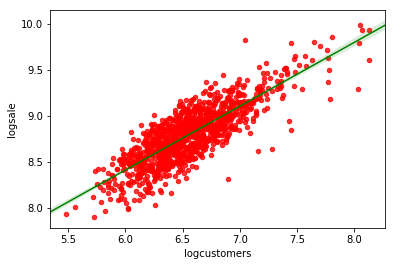

In [43]:
sns.regplot(x='logcustomers',y='logsale',data=cus_sel_rel,
            scatter_kws={'s':20,'alpha':0.8,'color':'red'},
            line_kws={'color':'green','lw':1.5}
           )

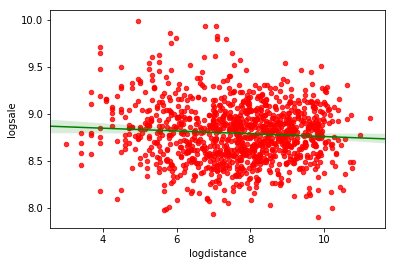

In [44]:
#competition distance is very lighly affecting the sales in a negative manner
sns.regplot(x='logdistance',y='logsale',data=cus_sel_rel,
            scatter_kws={'s':20,'alpha':0.8,'color':'red'},
            line_kws={'color':'green','lw':1.5}
           )

In [45]:
# I wanna know if there were open stores that had no sale
open_no_sale = train[(train.sales == 0) & (train.open == 1)]

In [46]:
open_no_sale.head()

,store,dayofweek,date,sales,customers,open,storetype,assortment,competitiondistance,year,month,day
22589,25,4,2014-02-13,0,0,1,3,1,430.0,2014,2,13
22590,25,3,2014-02-12,0,0,1,3,1,430.0,2014,2,12
25212,28,4,2014-09-04,0,0,1,1,1,1200.0,2014,9,4
25213,28,3,2014-09-03,0,0,1,1,1,1200.0,2014,9,3
25214,28,2,2014-09-02,0,0,1,1,1,1200.0,2014,9,2


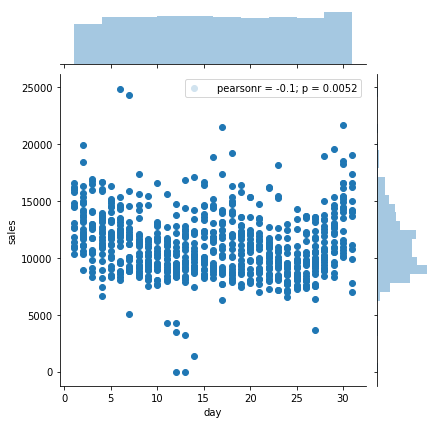

In [47]:
# Some of the stores have no sales, even though they have been open on working days of the week, I wanna know 
#the general distribution of sales for these stores 
sale_25_date = train.loc[(train.store==25)&(train.open==1),'sales']
day_25_date = train.loc[(train.store==25)&(train.open==1), 'day']
sns.jointplot(x = day_25_date, y= sale_25_date, data=train)

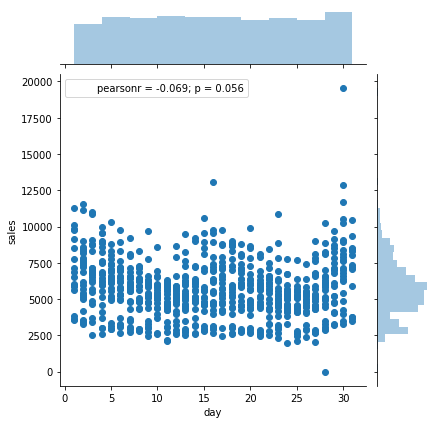

In [48]:
sale_391_date = train.loc[(train.store==391)&(train.open==1),'sales']
day_391_date = train.loc[(train.store==391)&(train.open==1), 'day']
sns.jointplot(x = day_391_date, y= sale_391_date, data=train)

In [49]:
#Here, I didvide the sales in 3 groups, where each group correspond to the amount of sales in the beginning of
# the month, middle of the month and the end of the month. I wanna know how different periods affect the sales
allMonth = train.groupby(['month','year','day','open'], as_index = False).agg({'sales': lambda y:np.mean([x for x in y])})

In [50]:
monthStart = allMonth.loc[(allMonth.day<7)&(allMonth.open==1)]

In [51]:
monthStart=monthStart.groupby('year').agg({'sales': lambda y:np.mean([x for x in y])})

In [52]:
monthMiddle = allMonth.loc[(allMonth.day>11)&(allMonth.day<18)&(allMonth.open==1)]

In [53]:
monthMiddle=monthMiddle.groupby('year').agg({'sales': lambda y:np.mean([x for x in y])})

In [54]:
monthEnd = allMonth.loc[(allMonth.day>24)&(allMonth.open==1)]

In [55]:
monthEnd=monthEnd.groupby('year').agg({'sales': lambda y:np.mean([x for x in y])})

In [56]:
df = pd.concat([monthStart,monthMiddle,monthEnd],axis = 0, ignore_index=False)
df['col'] = (len(monthStart)*('monthStart',) + len(monthMiddle)*('monthMiddle',) + len(monthEnd)*('monthEnd',))
df.reset_index(inplace=True)

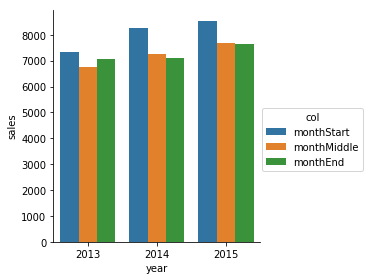

In [57]:
sns.factorplot(x='year', y='sales', hue='col', kind='bar', data=df)

In [58]:
#I wanna know the overall distribution of sales for wach year during each month
monthlySale = train.groupby(['month','year']).agg({'sales': lambda y:np.mean([x for x in y])})

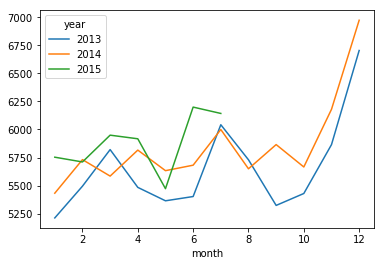

In [59]:
monthlySale['sales'].unstack().plot()